# Financial statement analysis:

This project analysis Googles finacial statement from the year 2018 to 2021. The API for this project is gotten from the [FinancialModelingprep.com](https://site.financialmodelingprep.com).

For the Income statement, we would be looking at important metrics like:
* Revenue Growth 
* Gross profit margin
* Net income growth
* Net income margin
* Return on equity (ROE)
* Asset Turnover

For the Balance sheet, we would be looking at:
* Working capital analysis
* Working current ratio
* Current ratio
* Quick Ratio
* Debt to Equity Ratio

**DISCLAIMER**: This is not investing advice. I am not a professional who is qualified in giving any financial advice. This is purely about programming using financial data.

In [ ]:
# Installing the Python request package that would allow us make request to the API
pip install requests

In [178]:
# Importing all necessary libraries for the analysis

import pandas as pd
import requests
import matplotlib.pyplot as plt
import plotly.express as px
import Config
import json

# Hiding warnings
import warnings
warnings.simplefilter('ignore')

### Getting the data 

In [167]:
# Hiding our API key in a text file for security reasons.
api_key= 'ed4bdde73a3763179e48f17205de9246'


# Specifying the company we would be analysing and the number of years. Set this way so that we can easily swicth to other companies
company = 'GOOGL'
years = 4

# Requesting for the income statement data from the API
IS_copy = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}')

# Requesting for the balance statement data from the API
BS_copy = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={api_key}&limit={years}')

# Storing our data in a Dataframe
IS_copy= pd.DataFrame(IS_copy.json())
BS_copy=pd.DataFrame(BS_copy.json())


### Income statement analysis
* Revenue Growth
* Gross profit margin
* Net income growth
* Net income margin
* Return on equity (ROE)
* Asset Turnover

In [168]:
# Displaying the data
IS_copy

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2022-12-31,GOOGL,USD,0001652044,2023-02-03,2023-02-02 21:23:45,2022,FY,282836000000,126203000000,...,0.252189,11356000000,59972000000,0.212038,4.490000,4.420000,13352993991,13553473900,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...
1,2021-12-31,GOOGL,USD,0001652044,2022-02-02,2022-02-01 21:08:02,2021,FY,257637000000,110939000000,...,0.352178,14701000000,76033000000,0.295117,5.694003,5.610003,13352993991,13553473900,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...
2,2020-12-31,GOOGL,USD,0001652044,2021-02-03,2021-02-02 20:12:25,2020,FY,182527000000,84732000000,...,0.263424,7813000000,40269000000,0.220619,2.957501,2.930501,13616313872,13740553816,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...
3,2019-12-31,GOOGL,USD,0001652044,2020-02-04,2020-02-03 21:03:59,2019,FY,161857000000,71896000000,...,0.244815,5282000000,34343000000,0.212181,2.479501,2.458001,13851914459,13971114411,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...


In [169]:
# Removing some columns that are not useful for our project

IS_copy.drop(['symbol', 'reportedCurrency', 'cik', 'fillingDate', 
                       'acceptedDate', 'calendarYear', 'period', 'link', 'finalLink'], axis=1, inplace=True)
IS_copy

,date,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
0,2022-12-31,282836000000,126203000000,156633000000,0.553794,39500000000,15724000000,26567000000,42291000000,0,...,-3514000000,71328000000,0.252189,11356000000,59972000000,0.212038,4.490000,4.420000,13352993991,13553473900
1,2021-12-31,257637000000,110939000000,146698000000,0.569398,31562000000,13510000000,22912000000,36422000000,0,...,12020000000,90734000000,0.352178,14701000000,76033000000,0.295117,5.694003,5.610003,13352993991,13553473900
2,2020-12-31,182527000000,84732000000,97795000000,0.535784,27573000000,11052000000,17946000000,28998000000,0,...,6858000000,48082000000,0.263424,7813000000,40269000000,0.220619,2.957501,2.930501,13616313872,13740553816
3,2019-12-31,161857000000,71896000000,89961000000,0.555805,26018000000,9551000000,18464000000,28015000000,0,...,5394000000,39625000000,0.244815,5282000000,34343000000,0.212181,2.479501,2.458001,13851914459,13971114411


In [118]:
# Transposing the table to get a better view
IS_copy.transpose()

,0,1,2,3
date,2022-12-31,2021-12-31,2020-12-31,2019-12-31
revenue,282836000000,257637000000,182527000000,161857000000
costOfRevenue,126203000000,110939000000,84732000000,71896000000
grossProfit,156633000000,146698000000,97795000000,89961000000
grossProfitRatio,0.553794,0.569398,0.535784,0.555805
researchAndDevelopmentExpenses,39500000000,31562000000,27573000000,26018000000
generalAndAdministrativeExpenses,15724000000,13510000000,11052000000,9551000000
sellingAndMarketingExpenses,26567000000,22912000000,17946000000,18464000000
sellingGeneralAndAdministrativeExpenses,42291000000,36422000000,28998000000,28015000000
otherExpenses,0,0,0,0


In [ ]:
#Getting the infomation about the data
IS_copy.info()

In [170]:
#converting the date column to date format
IS_copy['date'] = pd.to_datetime(IS_copy['date'])
IS_copy['date'] = IS_copy['date'].dt.strftime('%Y')

# Creating a dataframe that would store all our data
IS_analysis= pd.DataFrame(IS_copy['date'])

IS_analysis

,date
0,2022
1,2021
2,2020
3,2019


In [171]:
#Solving Gross profit margin =(Revenue - Cost of Goods sold) ÷ Revenue 
Gross_profit = IS_copy['revenue']-IS_copy['costOfRevenue']
Gross_profit_ratio= (Gross_profit/IS_copy['revenue']).round(2)

#Storing the Gross profit margin in our data frame
IS_analysis['Gross Profit Margin']= Gross_profit_ratio
IS_analysis

,date,Gross Profit Margin
0,2022,0.55
1,2021,0.57
2,2020,0.54
3,2019,0.56


In [172]:
#Solving for Net profit margin = net income (after taxes) ÷ revenue
Net_Profit_Margin = (IS_copy['netIncome']/IS_copy['revenue']).round(2)

#Storing the Net profit margin in our data frame
IS_analysis['Net Profit Margin']= Net_Profit_Margin
IS_analysis

,date,Gross Profit Margin,Net Profit Margin
0,2022,0.55,0.21
1,2021,0.57,0.30
2,2020,0.54,0.22
3,2019,0.56,0.21


In [173]:
# Solving for Return on equity (ROE) = net profit ÷ average shareholder equity for the period
ROE= (IS_copy['netIncome']/ BS_copy['totalStockholdersEquity']).round(2)

#Storing the Return on Equity in our dataframe
IS_analysis['Return on Equity']= ROE
IS_analysis

,date,Gross Profit Margin,Net Profit Margin,Return on Equity
0,2022,0.55,0.21,0.23
1,2021,0.57,0.30,0.30
2,2020,0.54,0.22,0.18
3,2019,0.56,0.21,0.17


In [174]:
# Solving for Asset turnover ratio Asset Turnover Ratio = Revenue / Total Assets
Asset_Turnover_Ratio = (IS_copy['revenue']/BS_copy['totalAssets']).round(2)

#Storing the Returns on asset in our dataframe
IS_analysis['Asset Turnover Ratio']= Asset_Turnover_Ratio 
IS_analysis

,date,Gross Profit Margin,Net Profit Margin,Return on Equity,Asset Turnover Ratio
0,2022,0.55,0.21,0.23,0.77
1,2021,0.57,0.30,0.30,0.72
2,2020,0.54,0.22,0.18,0.57
3,2019,0.56,0.21,0.17,0.59


In [175]:
# Adding the revenues column to our data base
IS_analysis['Revenue']= IS_copy['revenue']
IS_analysis

,date,Gross Profit Margin,Net Profit Margin,Return on Equity,Asset Turnover Ratio,Revenue
0,2022,0.55,0.21,0.23,0.77,282836000000
1,2021,0.57,0.30,0.30,0.72,257637000000
2,2020,0.54,0.22,0.18,0.57,182527000000
3,2019,0.56,0.21,0.17,0.59,161857000000


In [176]:
#Storing the Revenue growth in our dataframe
IS_analysis['Revenue Growth']= (IS_analysis['Revenue'].pct_change() * 100).round(2)
IS_analysis

,date,Gross Profit Margin,Net Profit Margin,Return on Equity,Asset Turnover Ratio,Revenue,Revenue Growth
0,2022,0.55,0.21,0.23,0.77,282836000000,NaN
1,2021,0.57,0.30,0.30,0.72,257637000000,-8.91
2,2020,0.54,0.22,0.18,0.57,182527000000,-29.15
3,2019,0.56,0.21,0.17,0.59,161857000000,-11.32


<Figure size 720x432 with 0 Axes>

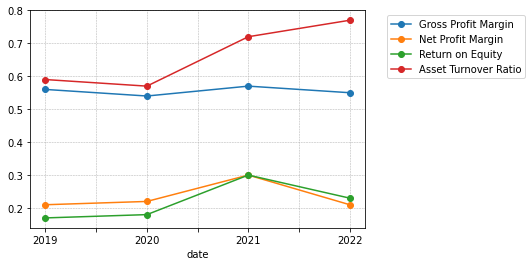

In [185]:

# Visualizing the data

IS_viz= IS_analysis.groupby('date')['Gross Profit Margin', 'Net Profit Margin', 'Return on Equity', 'Asset Turnover Ratio'].sum()

#Setting the size of the graph
plt.figure(figsize=(10,6))

#Plotting a line chart
IS_viz.plot(marker='o')

#Placing the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#Setting the size of the graph


# Including Grid lines
plt.grid(linestyle='--', linewidth=0.5)

plt.show()

## Balancesheet analysis

- Working capital analysis
- Working current ratio
- Current ratio
- Quick Ratio
- Debt to Equity Ratio

In [23]:
# Displaying the balance sheet
BS_copy

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2022-12-31,GOOGL,USD,0001652044,2023-02-03,2023-02-02 21:23:45,2022,FY,21879000000,91883000000,...,256144000000,256144000000,365264000000,0,365264000000,122375000000,27202000000,5323000000,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...
1,2021-12-31,GOOGL,USD,0001652044,2022-02-02,2022-02-01 21:08:02,2021,FY,20945000000,118704000000,...,251635000000,251635000000,359268000000,0,359268000000,148253000000,28395000000,7450000000,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...
2,2020-12-31,GOOGL,USD,0001652044,2021-02-03,2021-02-02 20:12:25,2020,FY,26465000000,110229000000,...,222544000000,222544000000,319616000000,0,319616000000,130932000000,26772000000,307000000,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...
3,2019-12-31,GOOGL,USD,0001652044,2020-02-04,2020-02-03 21:03:59,2019,FY,18498000000,101177000000,...,201442000000,201442000000,275909000000,0,275909000000,114255000000,15967000000,-2531000000,https://www.sec.gov/Archives/edgar/data/165204...,https://www.sec.gov/Archives/edgar/data/165204...


In [24]:
# Dropping columns we would not be needing for the analysis
BS_copy.drop(['symbol', 'reportedCurrency', 'cik', 'fillingDate', 
                       'acceptedDate', 'calendarYear', 'period', 'link', 'finalLink'], axis=1, inplace=True)
BS_copy

,date,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,...,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt
0,2022-12-31,21879000000,91883000000,113762000000,40258000000,2670000000,8105000000,164795000000,127049000000,28960000000,...,-7603000000,68184000000,256144000000,256144000000,365264000000,0,365264000000,122375000000,27202000000,5323000000
1,2021-12-31,20945000000,118704000000,139649000000,40270000000,1170000000,7054000000,188143000000,110557000000,22956000000,...,-1623000000,0,251635000000,251635000000,359268000000,0,359268000000,148253000000,28395000000,7450000000
2,2020-12-31,26465000000,110229000000,136694000000,31384000000,728000000,5490000000,174296000000,96960000000,21175000000,...,633000000,0,222544000000,222544000000,319616000000,0,319616000000,130932000000,26772000000,307000000
3,2019-12-31,18498000000,101177000000,119675000000,27492000000,999000000,4412000000,152578000000,84587000000,20624000000,...,-1232000000,0,201442000000,201442000000,275909000000,0,275909000000,114255000000,15967000000,-2531000000


In [25]:
# transposing the balance sheet
BS_copy.transpose()

,0,1,2,3
date,2022-12-31,2021-12-31,2020-12-31,2019-12-31
cashAndCashEquivalents,21879000000,20945000000,26465000000,18498000000
shortTermInvestments,91883000000,118704000000,110229000000,101177000000
cashAndShortTermInvestments,113762000000,139649000000,136694000000,119675000000
netReceivables,40258000000,40270000000,31384000000,27492000000
inventory,2670000000,1170000000,728000000,999000000
otherCurrentAssets,8105000000,7054000000,5490000000,4412000000
totalCurrentAssets,164795000000,188143000000,174296000000,152578000000
propertyPlantEquipmentNet,127049000000,110557000000,96960000000,84587000000
goodwill,28960000000,22956000000,21175000000,20624000000


In [201]:
#converting the date column to date format
BS_copy['date'] = pd.to_datetime(BS_copy['date'])
BS_copy['date'] = BS_copy['date'].dt.strftime('%Y')

# Creating a data frame where all our data would be saved
BS_analysis= pd.DataFrame(BS_copy['date'])
BS_analysis


,date
0,2022
1,2021
2,2020
3,2019


In [203]:
# SOlving for Working capital =  current assets - current liabilities
Working_capital = BS_copy['totalCurrentAssets'] - BS_copy['totalCurrentLiabilities']

#Storing working capital in our dataframe
BS_analysis['Working Capital'] = Working_capital
BS_analysis

,date,Working Capital
0,2022,95495000000
1,2021,123889000000
2,2020,117462000000
3,2019,107357000000


In [204]:
#Solving for Working Current Ratio = Current Assets ÷ Current Liabilities
Current_ratio =  (BS_copy['totalCurrentAssets']/BS_copy['totalCurrentLiabilities']).round(2)

#Storing working current ratio in our dataframe
BS_analysis['Current Ratio']= Current_ratio
BS_analysis

,date,Working Capital,Current Ratio
0,2022,95495000000,2.38
1,2021,123889000000,2.93
2,2020,117462000000,3.07
3,2019,107357000000,3.37


In [205]:
#Solving for Quick Ratio = (Current Assets-inventories)/current liabilities
Quick_assets = BS_copy['totalCurrentAssets'] - BS_copy['inventory']
Quick_ratio = (Quick_assets/BS_copy['totalCurrentLiabilities']).round(2)

#Storing Quick assets in our dataframe
BS_analysis['Quick Ratio']= Quick_ratio
BS_analysis

,date,Working Capital,Current Ratio,Quick Ratio
0,2022,95495000000,2.38,2.34
1,2021,123889000000,2.93,2.91
2,2020,117462000000,3.07,3.05
3,2019,107357000000,3.37,3.35


In [206]:
#Solving for Debt to Equity Ratio = Total liabilities/shareholders Equity
Equity_ratio = (BS_copy['totalLiabilities']/BS_copy['totalStockholdersEquity']).round(2)

##Storing Debt to equity ratio in our dataframe
BS_analysis['Debt to Equity Ratio'] = Equity_ratio
BS_analysis

,date,Working Capital,Current Ratio,Quick Ratio,Debt to Equity Ratio
0,2022,95495000000,2.38,2.34,0.43
1,2021,123889000000,2.93,2.91,0.43
2,2020,117462000000,3.07,3.05,0.44
3,2019,107357000000,3.37,3.35,0.37


In [207]:
# Solving for inventory turnover = Cost of Goods Sold ÷ Average Inventory for the Period
# Cost of Goods sold is gotten from the income statement
Inventory_turnover = (IS_copy['costOfRevenue']/ BS_copy['inventory']).round(2)

#Storing working Inventory turnover in our dataframe
BS_analysis['Inventory Turnover']= Inventory_turnover
BS_analysis

,date,Working Capital,Current Ratio,Quick Ratio,Debt to Equity Ratio,Inventory Turnover
0,2022,95495000000,2.38,2.34,0.43,47.27
1,2021,123889000000,2.93,2.91,0.43,94.82
2,2020,117462000000,3.07,3.05,0.44,116.39
3,2019,107357000000,3.37,3.35,0.37,71.97


In [213]:
# Solving for Debt to Assets ratio= Total liabilities/Total assets
Assets_ratio= (BS_copy['totalLiabilities']/BS_copy['totalAssets']).round(2)

#Storing Assets ratio in our dataframe
BS_analysis['Debts to Assets Ratio'] = Assets_ratio
BS_analysis

,date,Working Capital,Current Ratio,Quick Ratio,Debt to Equity Ratio,Inventory Turnover,Debts to Assets Ratio,Return on Assets
0,2022,95495000000,2.38,2.34,0.43,47.27,0.30,0.16
1,2021,123889000000,2.93,2.91,0.43,94.82,0.30,0.21
2,2020,117462000000,3.07,3.05,0.44,116.39,0.30,0.13
3,2019,107357000000,3.37,3.35,0.37,71.97,0.27,0.12


In [210]:
# Solving for Return on assets = Net income / Total assets
# Net income is from the income statement
Return_on_assets = (IS_copy['netIncome']/BS_copy['totalAssets']).round(2)

#Storing Return on assets in our dataframe
BS_analysis['Return on Assets'] = Return_on_assets
BS_analysis

,date,Working Capital,Current Ratio,Quick Ratio,Debt to Equity Ratio,Inventory Turnover,Debts to Assets Ratio,Return on Assets
0,2022,95495000000,2.38,2.34,0.43,47.27,0.30,0.16
1,2021,123889000000,2.93,2.91,0.43,94.82,0.30,0.21
2,2020,117462000000,3.07,3.05,0.44,116.39,0.30,0.13
3,2019,107357000000,3.37,3.35,0.37,71.97,0.27,0.12


In [137]:
# Visualising our data

fig = px.line(BS_analysis, x='date', y=['Current Ratio', 'Quick Ratio', 'Debt to Equity Ratio', 'Debts to Assets Ratio', 'Return on Assets'])
fig.show()

<Figure size 720x432 with 0 Axes>

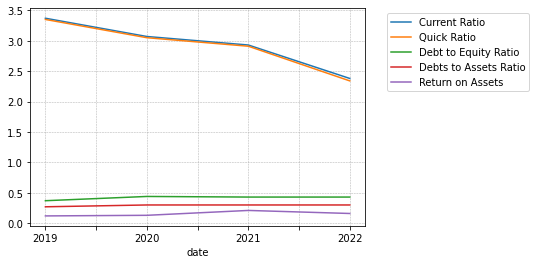

In [212]:
# Visualizing the data

BS_viz= BS_analysis.groupby('date')['Current Ratio', 'Quick Ratio', 'Debt to Equity Ratio', 'Debts to Assets Ratio', 'Return on Assets'].sum()

#Setting the size of the graph
plt.figure(figsize=(10,6))

#Plotting a line chart
BS_viz.plot()

#Placing the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#Setting the size of the graph


# Including Grid lines
plt.grid(linestyle='--', linewidth=0.5)

plt.show()